In [30]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

home_dir = os.path.abspath(os.path.join('..'))
sys.path.append(home_dir)
# if module_path not in sys.path:
# 	sys.path.append(module_path+"\\Common_Module")
from lib.utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 4.5 Fraunhofer diffraction example

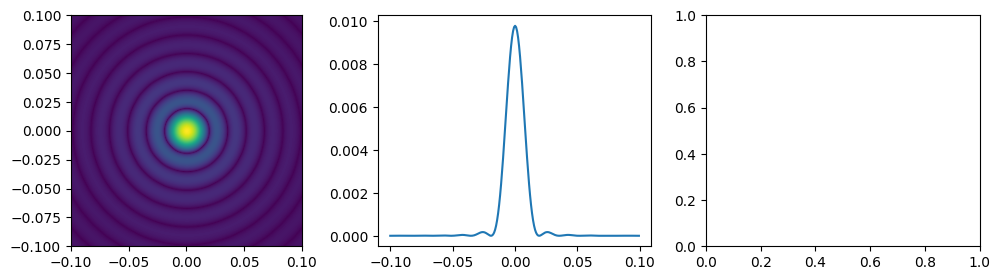

In [47]:
L = 0.2 # (m)
M = 250 
dx = L/M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

w = 10**-3 # half width of circle (m)
wavelength = 633 * 10**-9 # wavelength (m)
z = 50 # propagation distance (m)
k = 2*np.pi / wavelength # wavenumber
lz = wavelength*z

# irradiance
I2 = (w**2/lz)**2 * jinc(w/lz * np.sqrt(X**2 + Y**2))**2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I2, 1/3), extent=(-L/2, L/2, -L/2, L/2))
ax[1].plot(x, I2[int(M/2+1), :])


### 4.6 Exercises

#### 4.4

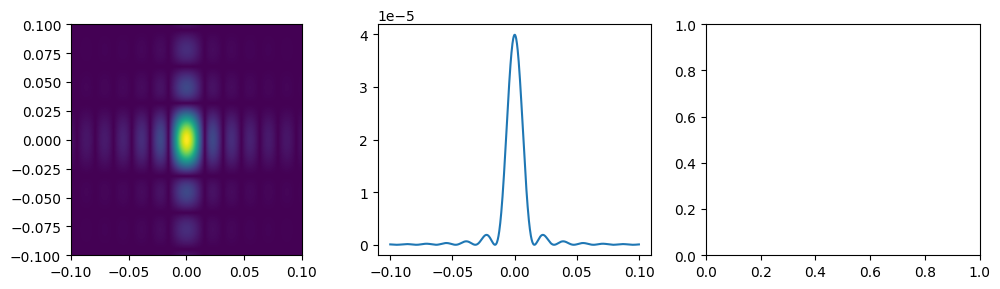

In [61]:
wl = 633 * 10**-9 # wavelength (m)
w1 = 0.1 * 10**-3 # x aperture size, (m)
w2 = 0.05 * 10**-3 # y aperture size, (m)

z = 5 # propagation distance, (m)
L = 0.2 # size length, (m)
M = 1000
dx = L/M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)
k = 2*np.pi / wl

I =(4*wx*wy / (wl*z))**2 * np.sinc(2*wx*X/(wl*z))**2 * np.sinc(2*wy*Y/(wl*z))**2


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.sqrt(I), extent=(-L/2, L/2, -L/2, L/2))
ax[1].plot(x, I[int(M/2+1), :])
plt.show()

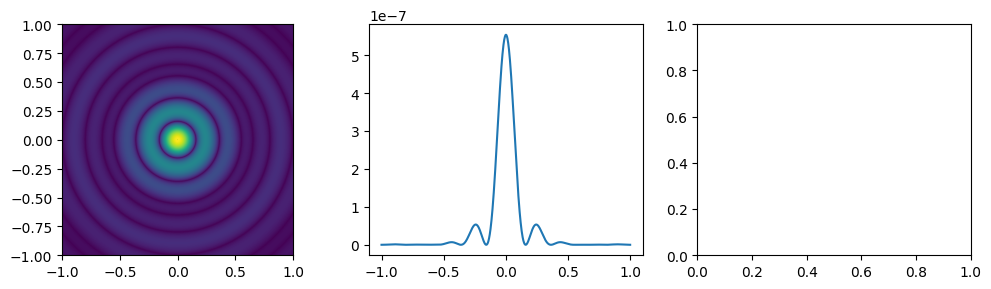

In [114]:
wl = 633 * 10**-9 # wavelength (m)
wx = 1 * 10**-3 # x outter radius, (m)
wy = 0.2 * 10**-3 # y inner radius, (m)

z = 50 # propagation distance, (m)
L = 2 # size length, (m)
M = 1000
dx = L/M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)
k = 2*np.pi / wl

lz = wl*z
rz = 1/lz*np.sqrt(X**2 + Y**2)

I = 1/lz**2 * (jinc(rz, w1) - jinc(rz, w2))**2


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I, 1/3), extent=(-L/2, L/2, -L/2, L/2))
ax[1].plot(x, I[int(M/2+1), :])
plt.show()

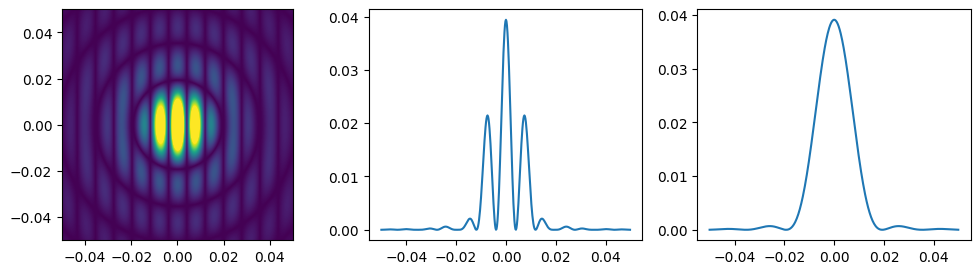

In [151]:
wl = 633 * 10**-9 # wavelength (m)
w = 1 * 10**-3 # x aperture radius, (m)
ds = 4 * 10**-3 # distance between the center of circle, (m)

z = 50 # propagation distance, (m)
L = 0.1 # size length, (m)
M = 500
dx = L/M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

lz = wl*z
rz = 1/lz*np.sqrt(X**2 + Y**2)

I = 4/lz**2 * np.cos(np.pi * ds / lz * X)**2 * jinc(rz, w)**2 


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I, 1/2), extent=(-L/2, L/2, -L/2, L/2), vmax=0.1, vmin=0)
ax[1].plot(x, I[int(M/2+1), :])
ax[2].plot(x, I[:, int(M/2+1)])

plt.show()

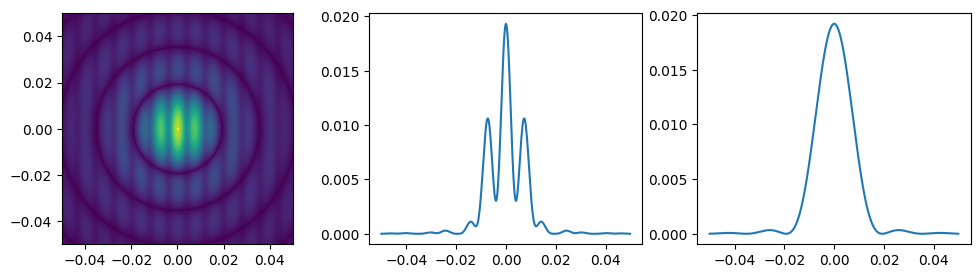

In [177]:
wl = 633 * 10**-9 # wavelength (m)
w = 1 * 10**-3 # x aperture radius, (m)
ds = 4 * 10**-3 # distance between the center of circle, (m)
A1 = 1 # amplitude of the field that exiting aperture 1
A2 = 0.4 # amplitude of the field that exiting aperture 2

z = 50 # propagation distance, (m)
L = 0.1 # size length, (m)
M = 500
dx = L/M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

lz = wl*z
rz = 1/lz*np.sqrt(X**2 + Y**2)

I = (A1**2+A2**2)/lz**2 * (1 + 2*A1*A2/(A1**2 + A2**2)*np.cos(2*np.pi * ds / lz * X)) * jinc(rz, w)**2 


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I, 1/3), extent=(-L/2, L/2, -L/2, L/2), vmax=0.3, vmin=0.001)
ax[1].plot(x, I[int(M/2+1), :])
ax[2].plot(x, I[:, int(M/2+1)])

plt.show()